In [1]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

import analysis
import razor_data
import toy_data
import plotting
import gp
importlib.reload(analysis);
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

In [52]:
def run_variational_gp(box, btags, num_mr_bins, mr_max,
                      k_ell=200, k_alpha=200, 
                      steps=10000, lr=0.01,
                      train_Z=True,
                      verbose=False, scale=0.001):
    kernel = gp.SquaredExponentialKernel(k_ell, k_alpha, fixed=True)
    data = analysis.get_data(box, btags, num_mr_bins, mr_max, scale=scale)
    U = data['u']
    Y = data['y']
    initial_m = (Y + 0.001).log().unsqueeze(1).clone()
    G = gp.VariationalPoissonGP(kernel, U, Y, train_Z=train_Z,
                               initial_m=initial_m)
    G.fit(num_steps=steps, lr=lr, verbose=verbose)
    return G

def plot_G(G, box, btags, num_mr_bins, mr_max, ymin=0.1, scale=0.001):
    data = analysis.get_data(box, btags, num_mr_bins, mr_max, scale=scale)
    samples = np.exp(np.asarray(
            [G.sample(
                float(x), num_samples=40000) for x in data['u']]).T)
    plotting.plot_hist_1d(U=G.U.data, Y=G.Y.data, samples=samples,
                     Z=G.get_Z().data, ymin=ymin, x_scale=1/scale) 

In [53]:
box = 'SevenJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 0.7
k_alpha = 300
steps = 2000
lr = 0.01
verbose = True

G = run_variational_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose)

Iteration 0: -ELBO = 11728.579
Iteration 100: -ELBO = -1637.679
Iteration 200: -ELBO = -1700.645
Iteration 300: -ELBO = -1749.237
Iteration 400: -ELBO = -1781.731
Iteration 500: -ELBO = -1793.576
Iteration 600: -ELBO = -1799.066
Iteration 700: -ELBO = -1799.880
Iteration 800: -ELBO = -1802.301
Iteration 900: -ELBO = -1799.265
Iteration 1000: -ELBO = -1803.673
Iteration 1100: -ELBO = -1803.498
Iteration 1200: -ELBO = -1803.398
Iteration 1300: -ELBO = -1804.811
Iteration 1400: -ELBO = -1802.282
Iteration 1500: -ELBO = -1805.648
Iteration 1600: -ELBO = -1805.566
Iteration 1700: -ELBO = -1805.849
Iteration 1800: -ELBO = -1801.940
Iteration 1900: -ELBO = -1796.923


In [54]:
G.fit(1000, verbose=True, clip=0.1)

Iteration 0: -ELBO = -1804.860
Iteration 100: -ELBO = -1804.684
Iteration 200: -ELBO = -1805.901
Iteration 300: -ELBO = -1806.366
Iteration 400: -ELBO = -1804.350
Iteration 500: -ELBO = -1806.417
Iteration 600: -ELBO = -1797.600
Iteration 700: -ELBO = -1804.511
Iteration 800: -ELBO = -1804.855
Iteration 900: -ELBO = -1806.728


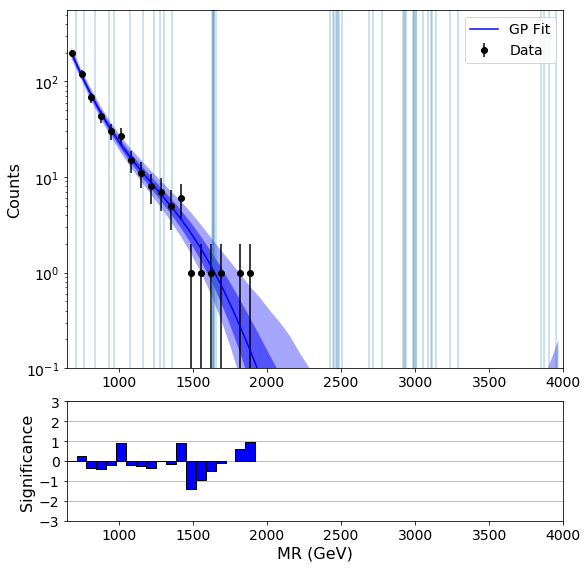

In [55]:
plot_G(G, box, btags, num_mr_bins, mr_max, ymin=0.1)

In [56]:
box = 'MultiJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 0.4
k_alpha = 200
steps = 4000
lr = 0.01
verbose = True

G = run_variational_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose)

Iteration 0: -ELBO = 16676.660
Iteration 100: -ELBO = -11351.121
Iteration 200: -ELBO = -11419.256
Iteration 300: -ELBO = -11441.612
Iteration 400: -ELBO = -11487.947
Iteration 500: -ELBO = -11506.269
Iteration 600: -ELBO = -11510.768
Iteration 700: -ELBO = -11514.712
Iteration 800: -ELBO = -11513.766
Iteration 900: -ELBO = -11514.203
Iteration 1000: -ELBO = -11511.427
Iteration 1100: -ELBO = -11518.320
Iteration 1200: -ELBO = -11518.320
Iteration 1300: -ELBO = -11518.177
Iteration 1400: -ELBO = -11518.738
Iteration 1500: -ELBO = -11518.945
Iteration 1600: -ELBO = -11519.436
Iteration 1700: -ELBO = -11514.655
Iteration 1800: -ELBO = -11519.493
Iteration 1900: -ELBO = -11519.087
Iteration 2000: -ELBO = -11518.145
Iteration 2100: -ELBO = -11519.719
Iteration 2200: -ELBO = -11512.279
Iteration 2300: -ELBO = -11519.094
Iteration 2400: -ELBO = -11519.555
Iteration 2500: -ELBO = -11517.544
Iteration 2600: -ELBO = -11520.447
Iteration 2700: -ELBO = -11518.090
Iteration 2800: -ELBO = -11519.97

In [57]:
G.fit(num_steps=1000, verbose=True, clip=0.1)

Iteration 0: -ELBO = -11519.059
Iteration 100: -ELBO = -11516.214
Iteration 200: -ELBO = -11520.078
Iteration 300: -ELBO = -11519.268
Iteration 400: -ELBO = -11520.315
Iteration 500: -ELBO = -11517.938
Iteration 600: -ELBO = -11519.188
Iteration 700: -ELBO = -11519.934
Iteration 800: -ELBO = -11518.874
Iteration 900: -ELBO = -11519.233


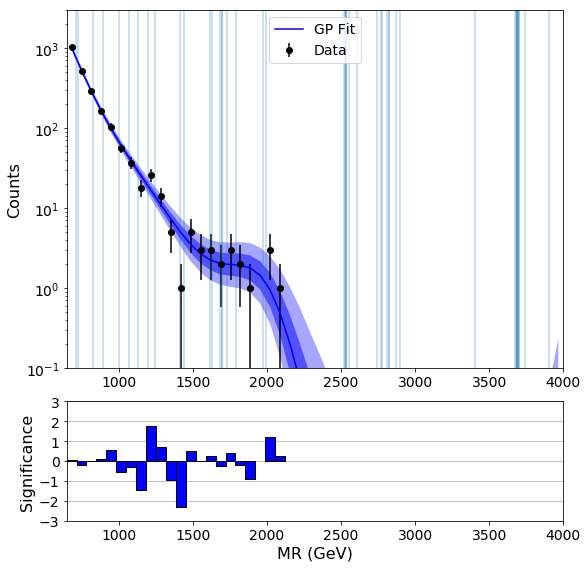

In [58]:
plot_G(G, box, btags, num_mr_bins, mr_max)

In [60]:
box = 'DiJet'
btags = 1
num_mr_bins = 50
mr_max = 2000
k_ell = 0.2
k_alpha = 100
steps = 2000
lr = 0.01
verbose = True

G = run_variational_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose)

Iteration 0: -ELBO = 108521.891
Iteration 100: -ELBO = -1958.900
Iteration 200: -ELBO = -2033.729
Iteration 300: -ELBO = -2079.773
Iteration 400: -ELBO = -2119.449
Iteration 500: -ELBO = -2135.194
Iteration 600: -ELBO = -2144.675
Iteration 700: -ELBO = -2150.491
Iteration 800: -ELBO = -2155.075
Iteration 900: -ELBO = -2158.894
Iteration 1000: -ELBO = -2163.047
Iteration 1100: -ELBO = -2166.237
Iteration 1200: -ELBO = -2165.012
Iteration 1300: -ELBO = -2172.765
Iteration 1400: -ELBO = -2174.934
Iteration 1500: -ELBO = -2176.097
Iteration 1600: -ELBO = -2177.172
Iteration 1700: -ELBO = -2181.591
Iteration 1800: -ELBO = -2180.240
Iteration 1900: -ELBO = -2180.588


In [61]:
G.fit(3000, verbose=True, clip=0.1)

Iteration 0: -ELBO = -2185.361
Iteration 100: -ELBO = -2194.594
Iteration 200: -ELBO = -2210.242
Iteration 300: -ELBO = -2225.129
Iteration 400: -ELBO = -2237.842
Iteration 500: -ELBO = -2245.264
Iteration 600: -ELBO = -2248.036
Iteration 700: -ELBO = -2253.454
Iteration 800: -ELBO = -2254.891
Iteration 900: -ELBO = -2256.823
Iteration 1000: -ELBO = -2254.170
Iteration 1100: -ELBO = -2257.797
Iteration 1200: -ELBO = -2256.229
Iteration 1300: -ELBO = -2256.938
Iteration 1400: -ELBO = -2257.392
Iteration 1500: -ELBO = -2256.589
Iteration 1600: -ELBO = -2257.341
Iteration 1700: -ELBO = -2256.482
Iteration 1800: -ELBO = -2256.511
Iteration 1900: -ELBO = -2256.785
Iteration 2000: -ELBO = -2255.563
Iteration 2100: -ELBO = -2256.216
Iteration 2200: -ELBO = -2257.744
Iteration 2300: -ELBO = -2259.188
Iteration 2400: -ELBO = -2256.132
Iteration 2500: -ELBO = -2256.149
Iteration 2600: -ELBO = -2255.499
Iteration 2700: -ELBO = -2255.843
Iteration 2800: -ELBO = -2258.970
Iteration 2900: -ELBO = -2

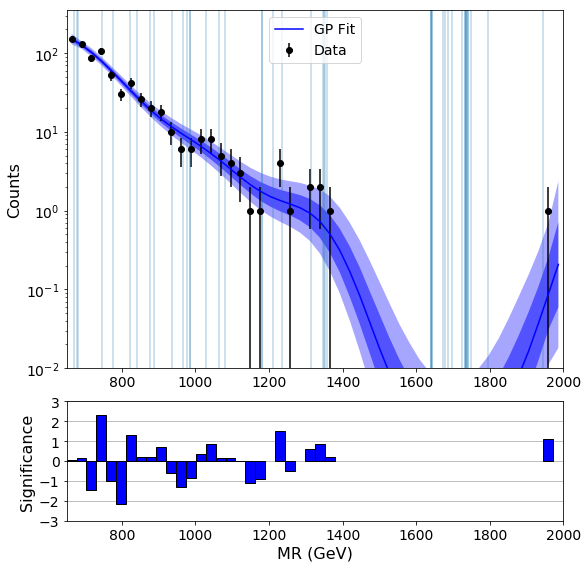

In [62]:
plot_G(G, box, btags, num_mr_bins, mr_max, ymin=0.01)

In [63]:
box = 'MultiJet'
btags = 1
num_mr_bins = 50
mr_max = 1800
k_ell = 0.4
k_alpha = 150
steps = 3000
lr = 0.01
verbose = True

G = run_variational_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose)

Iteration 0: -ELBO = 10550.232
Iteration 100: -ELBO = -16874.793
Iteration 200: -ELBO = -16933.582
Iteration 300: -ELBO = -16982.328
Iteration 400: -ELBO = -17010.139
Iteration 500: -ELBO = -17016.744
Iteration 600: -ELBO = -17018.324
Iteration 700: -ELBO = -17021.416
Iteration 800: -ELBO = -17022.455
Iteration 900: -ELBO = -17024.072
Iteration 1000: -ELBO = -17025.012
Iteration 1100: -ELBO = -17025.049
Iteration 1200: -ELBO = -17025.398
Iteration 1300: -ELBO = -17025.371
Iteration 1400: -ELBO = -17026.141
Iteration 1500: -ELBO = -17026.432
Iteration 1600: -ELBO = -17025.730
Iteration 1700: -ELBO = -17026.338
Iteration 1800: -ELBO = -17026.199
Iteration 1900: -ELBO = -17026.838
Iteration 2000: -ELBO = -17026.285
Iteration 2100: -ELBO = -17026.777
Iteration 2200: -ELBO = -17026.268
Iteration 2300: -ELBO = -17026.650
Iteration 2400: -ELBO = -17026.502
Iteration 2500: -ELBO = -17026.688
Iteration 2600: -ELBO = -17026.654
Iteration 2700: -ELBO = -17026.389
Iteration 2800: -ELBO = -17026.63

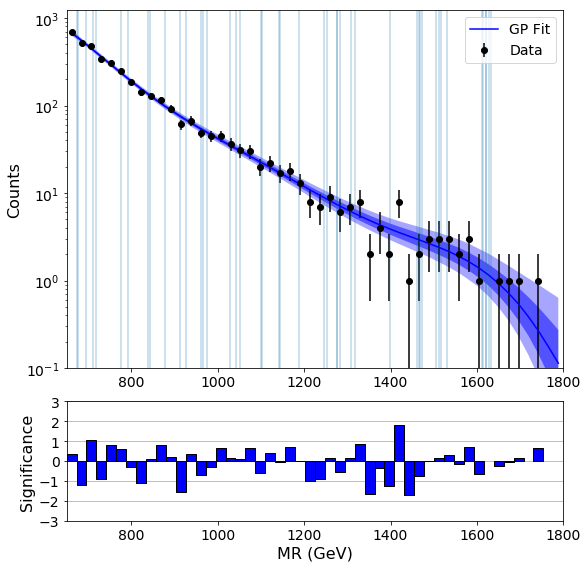

In [64]:
plot_G(G, box, btags, num_mr_bins, mr_max)

In [65]:
box = 'LeptonMultiJet'
btags = 3
num_mr_bins = 50
mr_max = 1800
k_ell = 0.4
k_alpha = 150
steps = 3000
lr = 0.01
verbose = True

G = run_variational_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, 
                      verbose=verbose)

Iteration 0: -ELBO = 115328.688
Iteration 100: -ELBO = 241.292
Iteration 200: -ELBO = 183.243
Iteration 300: -ELBO = 111.002
Iteration 400: -ELBO = 87.921
Iteration 500: -ELBO = 74.805
Iteration 600: -ELBO = 65.660
Iteration 700: -ELBO = 60.975
Iteration 800: -ELBO = 60.920
Iteration 900: -ELBO = 57.422
Iteration 1000: -ELBO = 57.148
Iteration 1100: -ELBO = 54.880
Iteration 1200: -ELBO = 56.113
Iteration 1300: -ELBO = 52.731
Iteration 1400: -ELBO = 53.774
Iteration 1500: -ELBO = 52.021
Iteration 1600: -ELBO = 61.303
Iteration 1700: -ELBO = 52.087
Iteration 1800: -ELBO = 49.357
Iteration 1900: -ELBO = 49.355
Iteration 2000: -ELBO = 50.322
Iteration 2100: -ELBO = 48.032
Iteration 2200: -ELBO = 48.937
Iteration 2300: -ELBO = 46.779
Iteration 2400: -ELBO = 46.653
Iteration 2500: -ELBO = 45.373
Iteration 2600: -ELBO = 49.283
Iteration 2700: -ELBO = 44.365
Iteration 2800: -ELBO = 45.670
Iteration 2900: -ELBO = 44.580


In [70]:
G.fit(num_steps=1000, lr=lr, verbose=verbose)

Iteration 0: -ELBO = 22.407
Iteration 100: -ELBO = 20.189
Iteration 200: -ELBO = 19.844
Iteration 300: -ELBO = 20.140
Iteration 400: -ELBO = 22.336
Iteration 500: -ELBO = 18.434
Iteration 600: -ELBO = 17.745
Iteration 700: -ELBO = 19.544
Iteration 800: -ELBO = 17.360
Iteration 900: -ELBO = 18.404


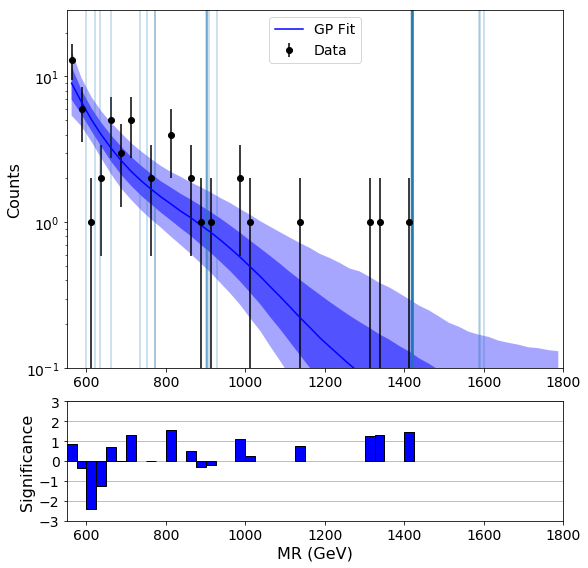

In [71]:
plot_G(G, box, btags, num_mr_bins, mr_max)